# Importing Libraries & Data

In [1]:
# importimg modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data Overview

In [2]:
# importing customer data & showing its general data
prod_df = pd.read_csv('product_data.csv')
display(prod_df.shape)
display(prod_df.head())
prod_df.info()

(500, 2)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [3]:
# first row example
prod_df['description'][0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

# EDA & Preprocessing

In [5]:
# showcase example
text = prod_df['description'][0]
text1 = prod_df['description'][493] # more similar with produc1
text2 = prod_df['description'][4] # more different with produc2
test_df = pd.DataFrame([text,text1,text2]).rename(columns={0:'description'})

In [6]:
# declaring common text preprocessing function
def preprocess_text(text):
    # Replace . & - with each assigned characters
    import re
    text = text.lower()
    text = text.replace('.', ' __PERIOD__ ') 
    text = text.replace('-', ' ')   

    # Remove special characters_1
    text = re.sub(r'[{}()\'"/]', '', text)

    # Replace special characters_2 with space
    text = re.sub(r'[;,:-@#%]', ' ', text) 
    return text

# applying function to the test df
test_df['description'] = test_df['description'].apply(preprocess_text)

In [7]:
# first example preprocessed (Product1)
test_df['description'][0]

'active classic boxers   theres a reason why our boxers are a cult favorite   they keep their cool  especially in sticky situations __PERIOD__  the quick drying  lightweight underwear takes up minimal space in a travel pack __PERIOD__  an exposed  brushed waistband offers next to skin softness  five panel construction with a traditional boxer back for a classic fit  and a functional fly __PERIOD__  made of 3 __PERIOD__ 7 oz 100  recycled polyester with moisture wicking performance __PERIOD__  inseam size m is 4 12 __PERIOD__  recyclable through the common threads recycling program __PERIOD__  br  br  b details  b  ul   li silky capilene 1 fabric is ultralight  breathable and quick to dry li   li exposed  brushed elastic waistband for comfort li   li 5 panel construction with traditional boxer back li   li inseam size m is 4 12 li  ul  br  br  b fabric   b 3 __PERIOD__ 7 oz 100  all recycled polyester with gladiodor natural odor control for the garment __PERIOD__  recyclable through the

In [8]:
# second example preprocessed (Product494)
test_df['description'][1]

'active boxer briefs   a no fuss travel companion  these skivvies love sink and creek baths  and they dry in a flash __PERIOD__  the quick wicking underwear breathes exceptionally well  keeping you comfortable in any condition __PERIOD__  an exposed elastic waistband is brushed for no chafe softness  the hem is coverstitched for a smooth glide beneath shorts or pants __PERIOD__  with a 5 12 inseam size m an easy access fly and a supportive front panel __PERIOD__  made from 100  polyester 54  recycled with moisture wicking performance __PERIOD__  recyclable through the common threads recycling program __PERIOD__  br  br  b details  b  ul   li moisture wicking capilene 2 fabric with an open knit weave for breathability li   li brushed elastic waistband for next to skin softness li   li supportive front panel li   li cover stitched hem for smooth glide under shorts or pants  wont restrict mobility li   li inseam size m is 5 12 li  ul  br  br  b fabric   b 4 oz 100  polyester 54  recycled 

In [9]:
# third example preprocessed (Product5)
test_df['description'][2]

'alpine wind jkt   on high ridges  steep ice and anything alpine  this jacket serves as a true best of all worlds staple __PERIOD__  it excels as a stand alone shell for blustery rock climbs  cool weather trail runs and high output ski tours __PERIOD__  and then  when conditions have you ice and alpine climbing  it functions as a lightly insulated windshirt on the approach  as well as a frictionless midlayer when its time to bundle up and tie in __PERIOD__  the polyester ripstop shell with a deluge dwr durable water repellent treatment sheds snow and blocks wind  while the smooth  lightly brushed hanging mesh liner wicks moisture  dries fast  and doesnt bind to your baselayers __PERIOD__  superlight stretch woven underarm panels enhance breathability and allow for unimpaired arm motion  and the two hand pockets close with zippers __PERIOD__  a drawcord hem  elastic cuffs  a heat transfer reflective logo and a regular coil  center front zipper with dwr finish round out the features __PE

In [10]:
# declaring the cosine similarity function
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import fuzz

def get_cosine_sim(*strs, v=1, show_vectors=0): 
    
    def get_vectors(*strs):
        text = [t for t in strs]
        if v==1: #CountVectorizer
            vectorizer = CountVectorizer(text)
        elif v==2: #TfidfVectorizer
            vectorizer = TfidfVectorizer(text)
        vectorizer.fit(text)
        return vectorizer.transform(text).toarray()
    vectors = [t for t in get_vectors(*strs)]
    
    if show_vectors==0:
        return cosine_similarity(vectors)
    else:
        return get_vectors(*strs)

In [11]:
# getting the example vectors from the texts
get_cosine_sim(test_df['description'][0], test_df['description'][1], show_vectors=1)

array([[ 2,  2,  0,  0,  1, 11,  0,  1,  1,  1,  2,  0,  1,  2,  0,  0,
         2,  2,  8,  0,  1,  0,  0,  2,  1,  0,  2,  1,  0,  2,  0,  0,
         2,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  2,  2,
         1,  1,  1,  0,  1,  3,  0,  0,  1,  0,  1,  1,  0,  0,  3,  2,
         3,  1,  0,  0,  8,  1,  0,  2,  1,  1,  0,  1,  1,  1,  0,  1,
         1,  1,  0,  0,  1,  3,  1,  2,  0,  1,  2,  2,  2,  1,  2,  2,
         2,  0,  0,  1,  0,  1,  2,  1,  0,  0,  1,  1,  1,  0,  0,  1,
         4,  1,  1,  0,  1,  2,  2,  2,  2,  1,  2,  1,  0,  1,  1,  0,
         2,  0,  1,  0,  1,  1,  4,  0,  0],
       [ 2,  2,  2,  1,  0,  9,  1,  1,  0,  3,  3,  1,  0,  0,  1,  1,
         1,  0,  8,  1,  0,  1,  1,  2,  1,  1,  0,  0,  1,  2,  1,  1,
         0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  2,  0,  1,  1,  2,
         0,  0,  0,  1,  1,  6,  1,  2,  0,  1,  1,  1,  2,  2,  3,  2,
         3,  0,  1,  1, 10,  0,  1,  2,  0,  0,  1,  2,  1,  1,  2,  1,
         0,  0,  1,

### --- Example 1 (Benchmarking Results on Product1-Product494 /More Similar) ---

In [29]:
import time
start = time.time()

# getting the example cosine similarity from the texts with countvectorizer
display(get_cosine_sim(test_df['description'][0], test_df['description'][1], v=1)[0][1])

print(f'Time: {time.time() - start}')

0.8443905903899785

Time: 0.0032770633697509766


In [32]:
start = time.time()

# getting the example cosine similarity from the texts with TfidfVectorizer
display(get_cosine_sim(test_df['description'][0], test_df['description'][1], v=2)[0][1])


print(f'Time: {time.time() - start}')

0.7542238349834613

Time: 0.015222311019897461


In [33]:
start = time.time()

# getting the example rapidfuzz token set ratio
display(fuzz.token_set_ratio(test_df['description'][0], test_df['description'][1])/100)

print(f'Time: {time.time() - start}')

0.7738461538461539

Time: 0.012053728103637695


### --- Example 2 (Benchmarking Results on Product1-Product5 /More Different) ---

In [39]:
start = time.time()

# getting the example cosine similarity from the texts with countvectorizer
display(get_cosine_sim(test_df['description'][0], test_df['description'][2], v=1)[0][1])

print(f'Time: {time.time() - start}')

0.6790925093968282

Time: 0.011217832565307617


In [42]:
start = time.time()

# getting the example cosine similarity from the texts with TfidfVectorizer
display(get_cosine_sim(test_df['description'][0], test_df['description'][2], v=2)[0][1])

print(f'Time: {time.time() - start}')

0.5425244648893441

Time: 0.014736413955688477


In [43]:
start = time.time()

display(fuzz.token_set_ratio(test_df['description'][0], test_df['description'][2])/100)

print(f'Time: {time.time() - start}')

0.5631981187536743

Time: 0.018030643463134766


- For ease of process & time, we're going to use Cosine Similarity with CountVectorizer for the next steps

### --- Creating Similarity Matrix with Cosine Similarity CountVectorizer---

In [44]:
# creating the dataframe of the test texts
lst_tab = []
for idx in range(0, len(test_df)):
    lst_row = []
    for col in range(0, len(test_df)):
        res = get_cosine_sim(test_df['description'][idx], test_df['description'][col], v=1) [0][1]
        lst_row.append(res)
    lst_tab.append(lst_row)    
df = pd.DataFrame(lst_tab)

# renaming columns & index
df.columns = ['product_1','product494','product5']
df.index = ['product_1','product494','product5']

df

,product_1,product494,product5
product_1,1.000000,0.844391,0.679093
product494,0.844391,1.000000,0.675314
product5,0.679093,0.675314,1.000000


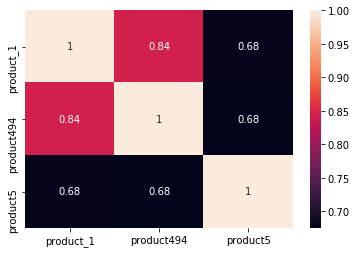

In [45]:
# example heatmap
sns.heatmap(df,annot=True)

# Applying Analysis to Whole Dataset

In [46]:
# data contingency
mydf = prod_df.copy()

In [47]:
# applying text preprocessing
mydf['description'] = mydf['description'].apply(preprocess_text)
mydf['description'].head(5)

0    active classic boxers   theres a reason why ou...
1    active sport boxer briefs   skinning up glory ...
2    active sport briefs   these superbreathable no...
3    alpine guide pants   skin in  climb ice  switc...
4    alpine wind jkt   on high ridges  steep ice an...
Name: description, dtype: object

In [128]:
# creating the dataframe of the test texts
lst_tab = []
for idx in range(0, len(mydf)):
    lst_row = []
    for col in range(0, len(mydf)):
        res = get_cosine_sim(mydf['description'][idx], mydf['description'][col], v=1) [0][1]
        lst_row.append(res)
    lst_tab.append(lst_row)    
df_desc = pd.DataFrame(lst_tab)

# get length of df's columns, ensure the same lengths of columns & finally renaming columns-indexes
num_cols = len(df_desc)
new_cols = ['product_' + str(i) for i in np.arange(1, num_cols+1)] 
df_desc.columns = new_cols[:num_cols]
df_desc.index = new_cols[:num_cols]

df_desc

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,...,product_491,product_492,product_493,product_494,product_495,product_496,product_497,product_498,product_499,product_500
product_1,1.000000,0.778586,0.735128,0.674829,0.679093,0.627939,0.634285,0.649841,0.746984,0.629904,...,0.700219,0.692948,0.705274,0.844391,0.775699,0.757902,0.717625,0.699837,0.750468,0.725834
product_2,0.778586,1.000000,0.832687,0.651419,0.659132,0.631817,0.639795,0.652303,0.709243,0.614469,...,0.677597,0.676311,0.677597,0.764430,0.696859,0.710263,0.667285,0.616325,0.714976,0.708823
product_3,0.735128,0.832687,1.000000,0.635946,0.694899,0.654260,0.639079,0.638945,0.677073,0.606188,...,0.702439,0.661922,0.686830,0.759404,0.751010,0.742793,0.679871,0.647600,0.661482,0.654141
product_4,0.674829,0.651419,0.635946,1.000000,0.753641,0.750765,0.711670,0.583299,0.662625,0.677843,...,0.607530,0.601275,0.603560,0.657103,0.604526,0.663694,0.644498,0.672603,0.678417,0.679464
product_5,0.679093,0.659132,0.694899,0.753641,1.000000,0.757411,0.717868,0.576757,0.677742,0.678506,...,0.632559,0.638866,0.635730,0.675314,0.618134,0.684628,0.683537,0.769047,0.661719,0.656978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
product_496,0.757902,0.710263,0.742793,0.663694,0.684628,0.666483,0.634874,0.601255,0.681981,0.621988,...,0.692520,0.680398,0.660403,0.801224,0.793763,1.000000,0.827722,0.655652,0.660827,0.676058
product_497,0.717625,0.667285,0.679871,0.644498,0.683537,0.665994,0.660692,0.566038,0.681804,0.607159,...,0.638285,0.711178,0.620877,0.720178,0.732729,0.827722,1.000000,0.670525,0.633917,0.631923
product_498,0.699837,0.616325,0.647600,0.672603,0.769047,0.687843,0.667733,0.546225,0.685826,0.623081,...,0.629611,0.650539,0.637106,0.664687,0.634285,0.655652,0.670525,1.000000,0.647184,0.623838
product_499,0.750468,0.714976,0.661482,0.678417,0.661719,0.647071,0.618110,0.668944,0.712733,0.644064,...,0.698558,0.657093,0.707630,0.721112,0.604490,0.660827,0.633917,0.647184,1.000000,0.892362


### --- Example (Get products similar to product 1) ---

In [159]:
# getting the similar product with threshold 0.8
df_desc[df_desc['product_1']>=0.8]['product_1']

product_1      1.000000
product_18     0.802389
product_19     0.824836
product_494    0.844391
Name: product_1, dtype: float64

In [183]:
# showcase product1
prod_df['description'][0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

In [184]:
# showcase product18
prod_df['description'][17]

'Cap 1 bottoms - Spring skiing is as transient as the wind. Move fast, move light, and still stay dry with our lightest-weight Capilene performance baselayer. These bottoms wick perspiration, breathe, and dry quickly. Under a shell, they insulate without overheating. The waistband is brushed for softness, inseams are set forward to prevent chafe, and a gusseted crotch improves mobility. With a functional fly. Made from 3.7-oz 100% all-recycled polyester, with Gladiodor natural odor control for the garment and 15-UPF sun protection. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Silky soft Capilene 1 is the lightest of our technical baselayer fabrics</li> <li>"Fast-drying, highly breathable and sleek, it provides 15-UPF sun protection and can be worn either on its own or under layers in cooler temps"</li> <li>Elastic waistband is brushed for next-to-skin softness</li> <li>"Streamlined, functional fly"</li> <li>Inseams are set forward to prevent c

In [185]:
# showcase product19
prod_df['description'][18]

'Cap 1 boxer briefs - On bivy or belay, the form-fitting Capilene 1 Boxer Briefs stay dry and comfortable. Made from 100% recycled polyester, the underwear excels at moisture-wicking and has Gladiodor natural odor control for the garment. Exposed elastic waistband is brushed for softness; the hem is coverstitched for a smooth glide beneath shorts or pants. Fully-functioning fly and supportive front panel keep you covered. 5 1/2" inseam (size M). Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Moisture-wicking Capilene 1 fabric with Gladiodor for exceptional next-to-skin comfort and natural odor control for the garment</li> <li>Brushed elastic waistband</li> <li>Supportive front panel</li> <li>"Cover-stitched hem for smooth glide under shorts or pants, won\'t restrict mobility"</li> <li>"Inseam (size M) is 5 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor&#174; natural odor control for the garment. Recyclab

In [186]:
# showcase product494
prod_df['description'][493]

'Active boxer briefs - A no-fuss travel companion, these skivvies love sink and creek baths, and they dry in a flash. The quick-wicking underwear breathes exceptionally well, keeping you comfortable in any condition. An exposed elastic waistband is brushed for no-chafe softness; the hem is coverstitched for a smooth glide beneath shorts or pants. With a 5 1/2" inseam (size M) an easy-access fly and a supportive front panel. Made from 100% polyester (54% recycled) with moisture-wicking performance. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Moisture-wicking Capilene 2 fabric with an open-knit weave for breathability</li> <li>Brushed elastic waistband for next-to-skin softness</li> <li>Supportive front panel</li> <li>"Cover-stitched hem for smooth glide under shorts or pants, won\'t restrict mobility"</li> <li>"Inseam (size M) is 5 1/2"""</li></ul><br><br><b>Fabric: </b>4-oz 100% polyester (54% recycled) with Gladiodor natural odor control for

In [270]:
# getting the similar products
list(df_desc[df_desc['product_1']>=0.8]['product_1'].items())

[('product_1', 1.0000000000000024),
 ('product_18', 0.802389142155009),
 ('product_19', 0.8248359032624542),
 ('product_494', 0.8443905903899785)]

### --- Example (Get products similar to product 2) ---

In [191]:
# showcase product1
prod_df['description'][1]

'Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that\'s fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won\'t roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Pr

In [192]:
# showcase product1
prod_df['description'][2]

'Active sport briefs - These superbreathable no-fly briefs are the minimalist\'s choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won\'t roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently and dries fast"</li> <li>Seamless construction</li> <li>Leg openings have half-inch self-binding for comfort</li> <li>Fly-free support</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Program"<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in Israel.'

In [271]:
# getting the similar products
list(df_desc[df_desc['product_2']>=0.8]['product_2'].items())

[('product_2', 1.000000000000001), ('product_3', 0.8326870064217323)]

### --- Compiling all the similar products of each product

In [275]:
# getting the similar product of each product (threshold 0.8)
similar_products = []
for i in df_desc.columns:
    res = df_desc[df_desc[i]>=0.8][i].keys().to_list()
    res.remove(i)
    similar_products.append(res) 

In [277]:
# concatenating result to the master data & showcasing results
mydf['similar products'] = pd.Series(similar_products)
mydf

,id,description,similar products
0,1,active classic boxers theres a reason why ou...,"[product_18, product_19, product_494]"
1,2,active sport boxer briefs skinning up glory ...,[product_3]
2,3,active sport briefs these superbreathable no...,[product_2]
3,4,alpine guide pants skin in climb ice switc...,"[product_159, product_343, product_379, produc..."
4,5,alpine wind jkt on high ridges steep ice an...,[product_308]
...,...,...,...
495,496,cap 2 bottoms cut loose from the maddening c...,"[product_18, product_22, product_23, product_1..."
496,497,cap 2 crew this crew takes the edge off fick...,"[product_20, product_21, product_22, product_2..."
497,498,all time shell no need to use that morning t...,"[product_267, product_302, product_386]"
498,499,all wear cargo shorts all wear cargo shorts ...,"[product_27, product_28, product_32, product_3..."
